## Digtal Image Processing Lab # 11

##### M. Shaheer Ijaz
##### 01-134212-127
##### BS ( CS ) 7-B

---
---


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

##### Task # 1

In [2]:
def erode(image, kernel):
    kernel_height, kernel_width = kernel.shape
    img_height, img_width = image.shape[0], image.shape[1]
    
    eroded_image = np.zeros_like(image)
    
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    
    for i in range(img_height):
        for j in range(img_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            if np.array_equal(region & kernel, kernel):  # All 1s in the kernel match
                eroded_image[i, j] = 1
    
    return eroded_image

def dilate(image, kernel):
    kernel_height, kernel_width = kernel.shape
    img_height, img_width = image.shape[0], image.shape[1]
    
    dilated_image = np.zeros_like(image)
    
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    
    for i in range(img_height):
        for j in range(img_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            if np.any(region & kernel):  # At least one 1 in the kernel matches
                dilated_image[i, j] = 1
    
    return dilated_image

In [3]:
def opening(image, kernel):
    eroded = erode(image, kernel)
    opened = dilate(eroded, kernel)
    return opened

def closing(image, kernel):
    dilated = dilate(image, kernel)
    closed = erode(dilated, kernel)
    return closed

In [43]:
img = cv2.imread("one.jpg", cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(img, 126, 255, cv2.THRESH_BINARY)
kernel = np.array([
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
    ])

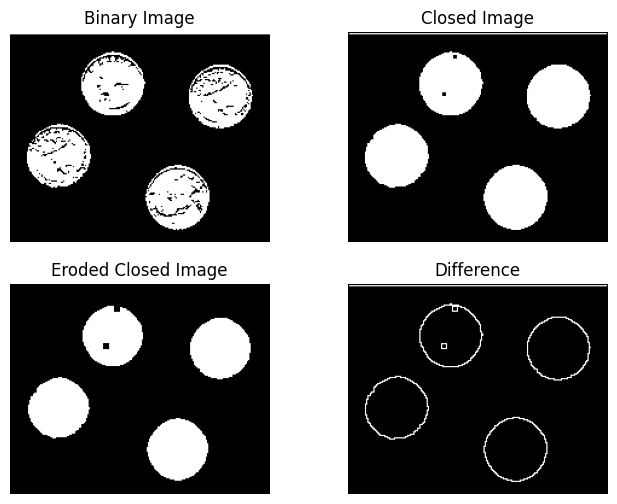

In [44]:
# closed_img = closing(binary_image, kernel)
# eroded_closed_image = erode(closed_img, kernel)
# edgeing = eroded_closed_image - binary_image  

closed = closing(binary_image, kernel)
erosion = erode(closed, kernel)
sub = closed - erosion

plt.figure(figsize=(8,6))
plt.subplot(221)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')


plt.subplot(222)
plt.imshow(closed, cmap='gray')
plt.title('Closed Image')
plt.axis('off')

plt.subplot(223)
plt.imshow(erosion, cmap='gray')
plt.title('Eroded Closed Image')
plt.axis('off')

plt.subplot(224)
plt.imshow(sub, cmap='gray')
plt.title('Difference')
plt.axis('off')

plt.show()

---

---

##### Task # 2

(-0.5, 141.5, 169.5, -0.5)

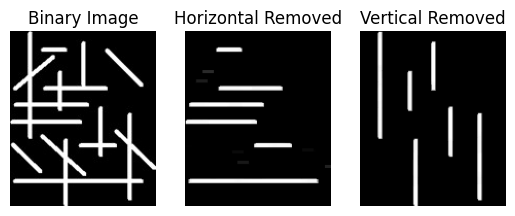

In [20]:
img = cv2.imread("lines.jpg", cv2.IMREAD_GRAYSCALE)


horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 3))
horizontal_lines = cv2.morphologyEx(img, cv2.MORPH_OPEN, horizontal_kernel)

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 11))
vertical_lines = cv2.morphologyEx(img, cv2.MORPH_OPEN, vertical_kernel)

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Binary Image')
plt.axis('off')


plt.subplot(132)
plt.imshow(horizontal_lines, cmap='gray')
plt.title('Horizontal Removed')
plt.axis('off')

plt.subplot(133)
plt.imshow(vertical_lines, cmap='gray')
plt.title('Vertical Removed')
plt.axis('off')


----

----

##### Task # 3

Number of lines: 1
Number of words: 1


(-0.5, 752.5, 249.5, -0.5)

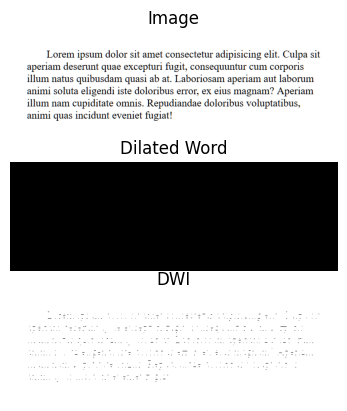

In [35]:
image = cv2.imread('Image.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
horizontal_kernel = np.ones((7, 5), np.uint8)  # Adjust the size as needed
dilated_image = cv2.dilate(binary_image, horizontal_kernel)
num_labels, labels_im = cv2.connectedComponents(dilated_image)
num_lines = num_labels - 1
print(f'Number of lines: {num_lines}')
word_kernel = np.ones((1, 5), np.uint8)  # Adjust the size as needed
dilated_word_image = cv2.dilate(binary_image, word_kernel)
num_word_labels, word_labels_im = cv2.connectedComponents(dilated_word_image)
num_words = num_word_labels - 1
print(f'Number of words: {num_words}')

plt.subplot(311)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.axis('off')


plt.subplot(312)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Word')
plt.axis('off')

plt.subplot(313)
plt.imshow(dilated_word_image, cmap='gray')
plt.title('DWI')
plt.axis('off')

---

---

#### Task # 4

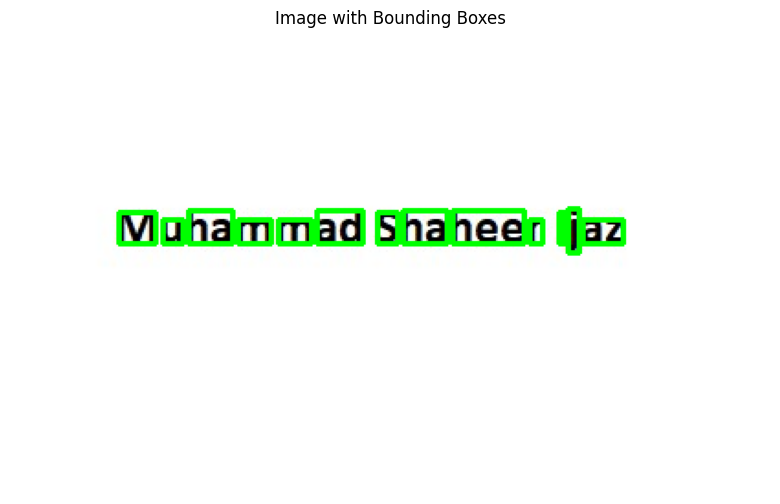

In [ ]:
def detect_text(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return img, thresh

img_path = "name.jpg"
img_with_boxes, thresholded_img = detect_text(img_path)

plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
plt.title("Image with Bounding Boxes")
plt.axis('off')
plt.show()
